<a href="https://colab.research.google.com/github/pedrocostanunes/Python-Analise_Exploratoria/blob/main/Limpeza_AnaliseExploratoria_OLIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

## Olá! Seja bem-vinde!

Este é um projeto focado totalmente em servir como portfólio de analista de dados e demonstrar skills e repertório para Limpeza e Análise Exploratória em Python. Tudo certo com estas finalidades?

##  Beleza, vamos ao contexto! 

A base de dados utilizada aqui é a ["Brazilian E-Commerce Public Dataset by Olist"](https://https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce), um dataset que possui informações sobre o e-commerce brasileiro entre 2016 e 2018, sendo mais de 100 mil registros de pedidos feitos por clientes em todo o país, assim como vendedores espalhados em diversos estados. Você pode saber mais sobre a OLIST e como esta empresa se faz presente no mercado de e-commerce brasileiro [clicando aqui](https://https://olist.com/pt-br/).

Pra resumir, este notebook tem como objetivo responder a **5 perguntas de negócio** sobre performance de **pedidos entregues** pelo e-commerce no Brasil. Sendo elas:

1. **Existe diferença do tempo de entrega por estado?**

2. **Quais são as cidades que tem o maior tempo de entrega médio?**

3. **As dimensões do produto influenciam no tempo de entrega?**

4. **O horário e o dia da semana em que o pedido é realizado impactam o tempo de entrega?**

5. **A distância entre a cidade do vendedor e do cliente impacta na performance de entrega?**

E para conseguir as respostas, vamos passar por diferentes etapas que foram dividas sessões:

- Importação de bibliotecas e Carregamento
- Limpeza, Tratamento e Preparação dos Dados
- Análise Descritiva
- Análise Exploratória de Dados
- Conclusão (estará disponível na próxima versão deste notebook)

*obs.: este notebook é melhor visualizado no Google Colaboratory. Clique em "Open in Colab" no topo desta página para abrir a versão original.*

---

Sinta-se à vontade para me contactar e passar feedbacks de como posso melhorar este projeto. Aliás, te agradeceria muito se o fizer! 

No mais, divirta-se e boa leitura! 



# Importação de bibliotecas e carregamento de dados

Importando bibliotecas necessárias

In [986]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Carregando os dados

In [987]:
clientes = pd.read_csv('/content/olist_customers_dataset.csv', sep =',')
pedidos = pd.read_csv('/content/olist_orders_dataset.csv', sep =',')
itens_pedidos = pd.read_csv('/content/olist_order_items_dataset.csv', sep =',')
pagamentos = pd.read_csv('/content/olist_order_payments_dataset.csv', sep =',')
produtos = pd.read_csv('/content/olist_products_dataset.csv', sep =',')
vendedores = pd.read_csv('/content/olist_sellers_dataset.csv', sep =',')
geolocalizacao = pd.read_csv('/content/olist_geolocation_dataset.csv', sep =',')

# Limpeza, tratamento e preparação dos dados

## Qualidade dos dados

### Visualizando os DataFrames

In [988]:
clientes.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG


In [989]:
pedidos.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


In [990]:
itens_pedidos.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


In [991]:
pagamentos.head(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84
8,1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95


In [992]:
produtos.head(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.0,163.0,1.0,400.0,27.0,13.0,17.0
9,8c92109888e8cdf9d66dc7e463025574,brinquedos,36.0,1156.0,1.0,600.0,17.0,10.0,12.0


In [993]:
vendedores.head(10)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
5,c240c4061717ac1806ae6ee72be3533b,20920,rio de janeiro,RJ
6,e49c26c3edfa46d227d5121a6b6e4d37,55325,brejao,PE
7,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP
8,768a86e36ad6aae3d03ee3c6433d61df,1529,sao paulo,SP
9,ccc4bbb5f32a6ab2b7066a4130f114e3,80310,curitiba,PR


In [994]:
geolocalizacao.head(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP
6,1047,-23.546273,-46.641225,sao paulo,SP
7,1013,-23.546923,-46.634264,sao paulo,SP
8,1029,-23.543769,-46.634278,sao paulo,SP
9,1011,-23.547640,-46.636032,sao paulo,SP


### Resumo dos dados

In [995]:
datasets = [clientes, pedidos, itens_pedidos, pagamentos, produtos, vendedores, geolocalizacao]
titulos = ['clientes', 'pedidos', 'itens_pedidos', 'pagamentos', 'produtos', 'vendedores', 'geolocalizacao']

resumo_dados = pd.DataFrame({},)
resumo_dados['datasets']= titulos
resumo_dados['linhas']= [data.shape[0] for data in datasets]
resumo_dados['colunas']= [data.shape[1] for data in datasets]
resumo_dados['duplicatas']= [data.duplicated().sum() for data in datasets]
resumo_dados['nulos']= [data.isnull().sum().sum() for data in datasets]

resumo_dados.style.background_gradient(cmap='RdPu').set_properties(**{'width': '120px', 'height': '20px'})
# Este output é melhor visualizado no Google Colab

,datasets,linhas,colunas,duplicatas,nulos
0,clientes,99441,5,0,0
1,pedidos,99441,8,0,4908
2,itens_pedidos,112650,7,0,0
3,pagamentos,103886,5,0,0
4,produtos,32951,9,0,2448
5,vendedores,3095,4,0,0
6,geolocalizacao,1000163,5,261831,0


## Tratando dados nulos

Na sessão anterior os DataFrames **produtos** e **pedidos** possuem valores nulos.

Vamos analisá-los:

### 1. pedidos

In [996]:
pedidos.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Neste DataFrame encontramos **4.908 campos nulos** divididos em **3 colunas**.

Tendo em mente que nossa análise será feita com base em apenas **pedidos entregues**, vamos relacionar os dados nulos com a quantidade destes que tem seu
**'order_status'** como **'delivered'**. Assim será possível decidir se podemos 
ou não remover os campos nulos do DF.

In [997]:
pedidos_aprovados_nulos = pedidos.loc[pedidos['order_approved_at'].isnull()]
pedidos_aprovados_nulos.order_status.value_counts()

canceled     141
delivered     14
created        5
Name: order_status, dtype: int64

In [998]:
pedidos_transportadora_nulos = pedidos.loc[pedidos['order_delivered_carrier_date'].isnull()]
pedidos_transportadora_nulos.order_status.value_counts()

unavailable    609
canceled       550
invoiced       314
processing     301
created          5
approved         2
delivered        2
Name: order_status, dtype: int64

Das **4.908 linhas** com valores nulos neste DF, apenas **24 linhas** são relacionadas ao status de entrega **'delivered'**

Logo, vamos considerar que todas essas linhas com valores nulos podem ser removidas sem gerar impacto relevante em nossas análises. 

In [999]:
pedidos = pedidos.dropna()
pedidos.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

### 2. produtos

In [1000]:
produtos.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

O DataFrame 'produtos' possui mais de **30.000 linhas**. Encontramos apenas **610 destas** com campos nulos em **4 colunas**. Decidimos que também vamos remover estas linhas pois a baixa quantidade não afetará a análise.

In [1001]:
produtos = produtos.dropna()
produtos.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

## Removendo duplicatas

Vimos no **'Resumo dos dados'** que apenas o DataFrame **'geolocalizacao'** possui dados duplicados. 

Vamos simplesmente removê-los.

In [1002]:
geolocalizacao.drop_duplicates(inplace=True)
geolocalizacao.duplicated().sum()

0

----

## Transformação dos dados

### 1. clientes

In [1003]:
clientes.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

**'customer_zip_code_prefix'** contém números, mas não será usada para operações matemáticas. Vamos converter esta coluna para **str**

In [1004]:
clientes['customer_zip_code_prefix'] = clientes['customer_zip_code_prefix'].astype(str)
clientes.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix    object
customer_city               object
customer_state              object
dtype: object

### 2. pedidos

In [1005]:
pedidos.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

Como vimos em "Qualidade dos dados", este dataframe possui diversas colunas com informações em timestamp. Vamos transformá-las para **datetime**

In [1006]:
pedidos_datetime= ['order_purchase_timestamp', 'order_approved_at','order_delivered_carrier_date',
                   'order_delivered_customer_date','order_estimated_delivery_date']
pedidos[pedidos_datetime]=pedidos[pedidos_datetime].apply(pd.to_datetime)
print(pedidos.dtypes)

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object


<ipython-input-1006-bbdfea30bb87>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pedidos[pedidos_datetime]=pedidos[pedidos_datetime].apply(pd.to_datetime)


### 3. itens_pedidos

In [1007]:
itens_pedidos.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

Aqui, **'order_id** é um número de identificação única e não será usado para operações matemáticas. Vamos transmormar esta coluna para **str**

In [1008]:
itens_pedidos['order_item_id'] = itens_pedidos['order_item_id'].astype(str)
print(itens_pedidos.dtypes)

order_id                object
order_item_id           object
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object


### 4. pagamentos

In [1009]:
pagamentos.dtypes

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

### 5. produtos

In [1010]:
produtos.dtypes

product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

Aqui, '**product_name_lenght**', '**product_description_lenght**' e '**product_photos_qty**' são variáveis que precisam apresentar números inteiros. Vamos transformá-las para **int**

In [1011]:
produtos_int = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty']
produtos[produtos_int] = produtos[produtos_int].astype(int)
print(produtos.dtypes)

product_id                     object
product_category_name          object
product_name_lenght             int64
product_description_lenght      int64
product_photos_qty              int64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object


<ipython-input-1011-047deabdf043>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  produtos[produtos_int] = produtos[produtos_int].astype(int)


### 6. vendedores

In [1012]:
vendedores.dtypes

seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object

**'seller_zip_code_prefix'** contém números, mas não será usada para operações matemáticas. Vamos converter esta coluna para **str**

In [1013]:
vendedores['seller_zip_code_prefix'] = vendedores['seller_zip_code_prefix'].astype(str)
vendedores.dtypes

seller_id                 object
seller_zip_code_prefix    object
seller_city               object
seller_state              object
dtype: object

### 7. geolocalizacao

In [1014]:
geolocalizacao.dtypes

geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

**'geolocation_zip_code_prefix'** contém números, mas não será usada para operações matemáticas. Vamos converter esta coluna para **str**

In [1015]:
geolocalizacao['geolocation_zip_code_prefix'] = geolocalizacao['geolocation_zip_code_prefix'].astype(str)
geolocalizacao.dtypes

geolocation_zip_code_prefix     object
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

## Merge dos datasets

*  Não vamos incluir **geolocalizacao** neste merge geral dos dados. Usaremos este DataFrame específico apenas para calcular a distância entre vendedores e clientes posteriormente.


In [1016]:
dados_olist= pd.merge(clientes, pedidos, on="customer_id")
dados_olist= dados_olist.merge(itens_pedidos, on="order_id")
dados_olist= dados_olist.merge(pagamentos, on="order_id")
dados_olist= dados_olist.merge(produtos, on="product_id")
dados_olist= dados_olist.merge(vendedores, on='seller_id')
dados_olist.shape

(113390, 33)

In [1017]:
dados_olist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113390 entries, 0 to 113389
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    113390 non-null  object        
 1   customer_unique_id             113390 non-null  object        
 2   customer_zip_code_prefix       113390 non-null  object        
 3   customer_city                  113390 non-null  object        
 4   customer_state                 113390 non-null  object        
 5   order_id                       113390 non-null  object        
 6   order_status                   113390 non-null  object        
 7   order_purchase_timestamp       113390 non-null  datetime64[ns]
 8   order_approved_at              113390 non-null  datetime64[ns]
 9   order_delivered_carrier_date   113390 non-null  datetime64[ns]
 10  order_delivered_customer_date  113390 non-null  datetime64[ns]
 11  

In [1018]:
dados_olist

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,41,1141,1,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,41,1141,1,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,41,1141,1,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,41,1141,1,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,41,1141,1,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113385,59168d27c5da6a50e3d1f03d482e80b2,393c2ace23a135d0bcc7e70167448e16,47800,barreiras,BA,c382d84d35f4d874b1f1c372f4bde27c,delivered,2018-07-20 09:42:40,2018-07-20 15:05:22,2018-07-23 11:53:00,...,49,1879,1,2250.0,16.0,28.0,16.0,40285,salvador,BA
113386,eda10d7eb51a675d000956fa1aabc7dd,5c22dbb9d8b5385953f2f1e6d9d115a7,39920,jordania,MG,b494f624c631105b24fe497277085909,delivered,2018-08-01 18:58:49,2018-08-02 18:50:15,2018-08-03 15:39:00,...,51,433,1,200.0,40.0,7.0,32.0,87015,maringa,PR
113387,b90b857a277b080d8078332b3636ab58,7f5f43a9394964ac51bc5d1e0204ead4,76400,uruacu,GO,d76fe905f4588ad69ab3b36527bb267d,delivered,2018-08-18 20:59:58,2018-08-18 21:10:13,2018-08-20 16:49:00,...,55,835,8,3211.0,36.0,53.0,22.0,83015,sao jose dos pinhais,PR
113388,1ed0c832c2dd99570a59260e71768bdf,82d46759af0369aad49084bacf85a6c3,37610,bom repouso,MG,51c6d2f460589fa7b65f2da51e860206,delivered,2017-11-14 12:04:09,2017-11-14 12:15:25,2017-11-27 20:44:47,...,33,63,1,6185.0,63.0,11.0,20.0,12914,braganca paulista,SP


## Traduzindo Colunas e Valores

Nesta sessão serão feitas traduções dos nomes das variáveis e valores para o português. Essas ações não são estritamente necessárias para as análises deste projeto, mas vão facilitar as leituras dos outputs e gráficos gerados.

Vamos incluir também nesta sessão a padronização dos nomes de cidade, tanto pelos motivos de vizualização, como para evitar que uma mesma cidade estjea com seu nome escrito de formas diferentes, fazendo parecer que são cidades diferentes nas análises.

### Traduzindo colunas

**DataFrame 'dados_olist'**

In [1019]:
colunas_traduzidas_olist = {
    'customer_id':'cliente_id',
    'customer_unique_id':'cliente_id_unico', 
    'customer_zip_code_prefix':'cliente_cep_prefixo',
    'customer_city':'cliente_cidade', 
    'customer_state':'cliente_estado', 
    'order_id':'pedido_id', 
    'customer_id':'cliente_id',
    'order_status':'pedido_status', 
    'order_purchase_timestamp':'pedido_compra_datahora',
    'order_approved_at':'pedido_aprovado_datahora', 
    'order_delivered_carrier_date':'pedido_postagem_datahora',
    'order_delivered_customer_date':'pedido_entrega_datahora', 
    'order_estimated_delivery_date':'pedido_entrega_estimativa', 
    'order_item_id':'item_pedido_id', 
    'product_id':'produto_id', 
    'seller_id':'vendedor_id',
    'shipping_limit_date':'data_entrega_limite', 
    'price':'preco', 
    'freight_value':'valor_frete',
    'payment_sequential':'pagamento_sequencia', 
    'payment_type':'pagamento_tipo',
    'payment_installments':'pagamento_parcelas', 
    'payment_value':'pagamento_valor', 
    'product_category_name':'produto_categoria', 
    'product_name_lenght':'produto_nome_tamanho',
    'product_description_lenght':'produto_descricao_tamanho', 
    'product_photos_qty':'produto_fotos_qtd', 
    'product_weight_g':'produto_peso_g',
    'product_length_cm':'produto_comprimento_cm', 
    'product_height_cm':'produto_altura_cm', 
    'product_width_cm':'produto_largura_cm',
    'seller_zip_code_prefix':'vendedor_cep_prefixo',
    'seller_city':'vendedor_cidade', 
    'seller_state':'vendedor_estado'  
}

dados_olist.rename(columns=colunas_traduzidas_olist, inplace=True)

In [1020]:
dados_olist.columns

Index(['cliente_id', 'cliente_id_unico', 'cliente_cep_prefixo',
       'cliente_cidade', 'cliente_estado', 'pedido_id', 'pedido_status',
       'pedido_compra_datahora', 'pedido_aprovado_datahora',
       'pedido_postagem_datahora', 'pedido_entrega_datahora',
       'pedido_entrega_estimativa', 'item_pedido_id', 'produto_id',
       'vendedor_id', 'data_entrega_limite', 'preco', 'valor_frete',
       'pagamento_sequencia', 'pagamento_tipo', 'pagamento_parcelas',
       'pagamento_valor', 'produto_categoria', 'produto_nome_tamanho',
       'produto_descricao_tamanho', 'produto_fotos_qtd', 'produto_peso_g',
       'produto_comprimento_cm', 'produto_altura_cm', 'produto_largura_cm',
       'vendedor_cep_prefixo', 'vendedor_cidade', 'vendedor_estado'],
      dtype='object')

**DataFrame 'geolocalizacao**

In [1021]:
geolocalizacao.columns

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

In [1022]:
colunas_traduzidas_geoloc = {
    'geolocation_zip_code_prefix':'geoloc_cep_prefixo', 
    'geolocation_lat':'geoloc_lat', 
    'geolocation_lng':'geoloc_lng',
    'geolocation_city':'geoloc_cidade', 
    'geolocation_state':'geoloc_estado'
}

geolocalizacao.rename(columns=colunas_traduzidas_geoloc, inplace=True)

In [1023]:
geolocalizacao.columns

Index(['geoloc_cep_prefixo', 'geoloc_lat', 'geoloc_lng', 'geoloc_cidade',
       'geoloc_estado'],
      dtype='object')

### Traduzindo valores de variáveis categóricas

In [1024]:
dados_olist['pedido_status'].unique()

array(['delivered', 'canceled'], dtype=object)

In [1025]:
traducao_pedido_status = {
    'delivered':'entregue', 
    'canceled':'cancelado'
 }

dados_olist['pedido_status'] = dados_olist['pedido_status'].map(traducao_pedido_status)
dados_olist['pedido_status'].unique()

array(['entregue', 'cancelado'], dtype=object)

In [1026]:
dados_olist['pagamento_tipo'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card'], dtype=object)

In [1027]:
traducao_pagamento_tipo = {'credit_card':'credito', 
                          'boleto':'boleto',
                          'voucher':'voucher',
                          'debit_card':'debito', 
                          'not_defined':'nao_informado'
 }

dados_olist['pagamento_tipo'] = dados_olist['pagamento_tipo'].map(traducao_pagamento_tipo)
dados_olist['pagamento_tipo'].unique()

array(['credito', 'boleto', 'voucher', 'debito'], dtype=object)

## Padronizando os nomes de cidades

Vamos colocar as cidades com **letra maiúscula** em suas iniciais para facilitar a leitura e padronizar este tipo de dado. Temos duas colunas no dataframe 'dados_olist' para atualizar: **'cliente_cidade'** e **'vendedor_cidade'**

Obs.: Como algumas cidades possuem preposições como **'de'**, **'do'**, **'da'**, vamos usar uma função para garantir que estas permaneçam minúsculas.

In [1028]:
dados_olist['cliente_cidade'] = dados_olist['cliente_cidade'].apply(lambda x: ' '.join(
    word.capitalize() if word not in ['de', 'do', 'da', 'dos', 'das']
                      else word
                      for word in x.split()
))

In [1029]:
dados_olist['vendedor_cidade'] = dados_olist['vendedor_cidade'].apply(lambda x: ' '.join(
    word.capitalize() if word not in ['de', 'do', 'da', 'dos', 'das'] 
                      else word
                      for word in x.split()
))

In [1030]:
cliente_cidade_unique = sorted(dados_olist['cliente_cidade'].unique())
print(cliente_cidade_unique)

['Abadia dos Dourados', 'Abadiania', 'Abaete', 'Abaetetuba', 'Abaiara', 'Abaira', 'Abare', 'Abatia', 'Abdon Batista', 'Abelardo Luz', 'Abrantes', 'Abre Campo', 'Abreu E Lima', 'Acaiaca', 'Acailandia', 'Acajutiba', 'Acarau', 'Acari', 'Acegua', 'Acopiara', 'Acreuna', 'Acu', 'Acucena', 'Adamantina', 'Adhemar de Barros', 'Adolfo', 'Adrianopolis', 'Adustina', 'Afogados da Ingazeira', 'Afonso Claudio', 'Afranio', 'Agisse', 'Agrolandia', 'Agronomica', 'Agua Boa', 'Agua Branca', 'Agua Clara', 'Agua Comprida', 'Agua Doce', 'Agua Doce do Norte', 'Agua Fria de Goias', 'Agua Limpa', 'Agua Nova', 'Agua Preta', 'Agua Santa', 'Aguai', 'Aguas Belas', 'Aguas Claras', 'Aguas Formosas', 'Aguas Frias', 'Aguas Lindas de Goias', 'Aguas Mornas', 'Aguas Vermelhas', 'Aguas da Prata', 'Aguas de Lindoia', 'Aguas de Santa Barbara', 'Aguas de Sao Pedro', 'Agudo', 'Agudos', 'Aguia Branca', 'Aimores', 'Aiuaba', 'Aiuruoca', 'Ajapi', 'Ajuricaba', 'Alagoa', 'Alagoa Grande', 'Alagoa Nova', 'Alagoinha', 'Alagoinhas', 'Al

In [1031]:
vendedor_cidade_unique = sorted(dados_olist['vendedor_cidade'].unique())
print(vendedor_cidade_unique)

['Abadia de Goias', 'Afonso Claudio', 'Aguas Claras Df', 'Alambari', 'Alfenas', 'Alvares Machado', 'Alvorada', 'Americana', 'Amparo', 'Ampere', 'Anapolis', 'Andira-pr', 'Andradas', 'Angra dos Reis', 'Angra dos Reis Rj', 'Ao Bernardo do Campo', 'Aparecida', 'Aparecida de Goiania', 'Aperibe', 'Apucarana', 'Aracaju', 'Aracatuba', 'Araguari', 'Arapongas', 'Ararangua', 'Araraquara', 'Araras', 'Araucaria', 'Araxa', 'Arinos', 'Armacao dos Buzios', "Arraial D'ajuda (porto Seguro)", 'Artur Nogueira', 'Aruja', 'Arvorezinha', 'Assis', 'Atibaia', 'Auriflama', 'Auriflama/sp', 'Avare', 'Bady Bassitt', 'Baependi', 'Bage', 'Bahia', 'Balenario Camboriu', 'Balneario Camboriu', 'Bandeirantes', 'Barbacena', 'Barbacena/ Minas Gerais', 'Bariri', 'Barra Mansa', 'Barra Velha', 'Barretos', 'Barrinha', 'Barro Alto', 'Barueri', 'Batatais', 'Bauru', 'Bebedouro', 'Belford Roxo', 'Belo Horizont', 'Belo Horizonte', 'Bento Goncalves', 'Bertioga', 'Betim', 'Birigui', 'Blumenau', 'Bocaiuva do Sul', 'Bofete', 'Boituva',

No output acima, na coluna 'vendedor_cidade', encontramos nomes de cidade fora do parão como: "**Arraial D'ajuda (porto Seguro)**", "**Pinhais/pr**","**Rio de Janeiro / Rio de Janeiro**", etc.

Vamos usar uma **expressão regular** para encontrar todas essas cidades com nomes despadronizados e substituí-las por registros padronizados. Também vamos fazer uma varredura manual para buscar nomes de cidade com erros de digitação. 

*Obs.: Um desses registros fora do padrão é um email 'Vendas@creditparts.com.br'.Em uma rápida pesquisa deste email, combinado com o prefixo do CEP, encontramos que a empresa é, na verdade, da cidade de Maringá.*

In [1032]:
# Encontrando as cidades com nomes fora do padrão

padrao_cidade = r"^[a-zA-Z]+(?:[ '][a-zA-Z]+)*$"
cidades_fora_padrao = dados_olist.loc[~dados_olist['vendedor_cidade'].str.match(padrao_cidade, na=False)]
print("Nomes de cidade fora do padrão:")
print(cidades_fora_padrao['vendedor_cidade'].unique())

Nomes de cidade fora do padrão:
['Maua/sao Paulo' 'Sao Paulo - Sp' 'Santa Barbara D´oeste'
 "Arraial D'ajuda (porto Seguro)" 'Santo Andre/sao Paulo'
 'Carapicuiba / Sao Paulo' 'Ribeirao Preto / Sao Paulo' 'Sp / Sp' 'Sbc/sp'
 'Andira-pr' 'Vendas@creditparts.com.br' 'Barbacena/ Minas Gerais'
 'Pinhais/pr' 'Jacarei / Sao Paulo' 'Sao Paulo / Sao Paulo'
 'Rio de Janeiro, Rio de Janeiro, Brasil'
 'Rio de Janeiro \\rio de Janeiro' 'Auriflama/sp' 'Mogi das Cruzes / Sp'
 'Lages - Sc' 'Cariacica / Es' 'Rio de Janeiro / Rio de Janeiro'
 'São Paulo' 'Sao Sebastiao da Grama/sp'
 'Novo Hamburgo, Rio Grande do Sul, Brasil']


In [1033]:
# Padronizando estes registros encontrados (incluindo os que encontramos manualmente)

dicionario_cidades_vendedores = {
    'Maua/sao Paulo':"Maua",
    'Sao Paulo - Sp':"Sao Paulo",
    'Angra dos Reis Rj':'Angra dos Reis',
    'Santa Barbara D´oeste':"Santa Barbara D'oeste",
    "Arraial D'ajuda (porto Seguro)":"Arraial D'ajuda", 
    'Santo Andre/sao Paulo':'Santo Andre',
    'Carapicuiba / Sao Paulo':'Carapicuiba',
    'Ribeirao Preto / Sao Paulo':'Ribeirao Preto', 
    'Sp / Sp':'Sao Paulo', 
    'Sbc/sp':'Sao Bernardo do Campo',
    'Andira-pr':'Andira',
    'Vendas@creditparts.com.br':'Maringa',
    'Barbacena/ Minas Gerais':'Barbacena',
    'Pinhais/pr':'Pinhais', 
    'Jacarei / Sao Paulo':'Jacarei',
    'Aguas Claras Df':'Aguas Clara',
    'Ao Bernardo do Campo':'Sao Bernardo do Campo',
    'Belo Horizont':'Belo Horizonte',
   'Santa Barbara D Oeste':"Santa Barbara D'Oeste",
    "Sao Miguel D'oeste":'Sao Miguel do Oeste',
    'Sao Paluo':'Sao Paulo',
    'Sao Paulop':'Sao Paulo',
    'São Paulo':'Sao Paulo',
    'Sp':'Sao Paulo',
    'Scao Jose do Rio Pardo':'Sao Jose do Rio Pardo',
    'Sao Paulo / Sao Paulo':'Sao Paulo', 
    'Rio de Janeiro, Rio de Janeiro, Brasil':'Rio de Janeiro',
    'Rio de Janeiro \\rio de Janeiro':'Rio de Janeiro',
    'Auriflama/sp':'Auriflama',
    'Mogi das Cruzes / Sp': 'Mogi das Cruzes',
    'Lages - Sc':'Lages',
    'Cariacica / Es':'Cariacica',
    'Rio de Janeiro / Rio de Janeiro':'Rio de Janeiro',
    'Sao Sebastiao da Grama/sp':'Sao Sebastiao da Grama',
    'Novo Hamburgo, Rio Grande do Sul, Brasil':'Novo Hamburgo'
}

dados_olist['vendedor_cidade'] = dados_olist['vendedor_cidade'].replace(dicionario_cidades_vendedores)
vendedor_cidade_corrigida = sorted(dados_olist['vendedor_cidade'].unique())
print(vendedor_cidade_corrigida)

['Abadia de Goias', 'Afonso Claudio', 'Aguas Clara', 'Alambari', 'Alfenas', 'Alvares Machado', 'Alvorada', 'Americana', 'Amparo', 'Ampere', 'Anapolis', 'Andira', 'Andradas', 'Angra dos Reis', 'Aparecida', 'Aparecida de Goiania', 'Aperibe', 'Apucarana', 'Aracaju', 'Aracatuba', 'Araguari', 'Arapongas', 'Ararangua', 'Araraquara', 'Araras', 'Araucaria', 'Araxa', 'Arinos', 'Armacao dos Buzios', "Arraial D'ajuda", 'Artur Nogueira', 'Aruja', 'Arvorezinha', 'Assis', 'Atibaia', 'Auriflama', 'Avare', 'Bady Bassitt', 'Baependi', 'Bage', 'Bahia', 'Balenario Camboriu', 'Balneario Camboriu', 'Bandeirantes', 'Barbacena', 'Bariri', 'Barra Mansa', 'Barra Velha', 'Barretos', 'Barrinha', 'Barro Alto', 'Barueri', 'Batatais', 'Bauru', 'Bebedouro', 'Belford Roxo', 'Belo Horizonte', 'Bento Goncalves', 'Bertioga', 'Betim', 'Birigui', 'Blumenau', 'Bocaiuva do Sul', 'Bofete', 'Boituva', 'Bom Jardim', 'Bom Jesus dos Perdoes', 'Bombinhas', 'Bonfinopolis de Minas', 'Borda da Mata', 'Botucatu', 'Braco do Norte', 'B

## Criação das colunas 'tempo_entrega', 'dia_da_compra' e 'distancia_km'

Pelas perguntas que teremos que responder neste notebook, já foi possível identificar **três** colunas que precisaremos criar para as análises. 

Para agilizar o processo, vamos adiantar a criação destas agora mesmo.

#### 'tempo_entrega'

Essa será a coluna que vai mostrar o intervalo de tempo entre **'pedido_compra_datahora'** e **'pedido_entrega_datahora'**

In [1034]:
dados_olist['tempo_entrega'] = (dados_olist['pedido_entrega_datahora'] - dados_olist['pedido_compra_datahora'])
dados_olist['tempo_entrega'] = dados_olist['tempo_entrega'].dt.days

Validando os valores da nova coluna (não pode ter negativos):

In [1035]:
count = dados_olist[dados_olist['tempo_entrega'] < 0]['tempo_entrega'].count()
print(f"O número de linhas onde 'tempo_entrega' é menor que zero é: {count}")

O número de linhas onde 'tempo_entrega' é menor que zero é: 0


#### 'dia_da_compra'

Essa coluna terá os **nomes** dos **dias da semana** em que os pedidos foram realizados

In [1036]:
dados_olist['dia_da_compra'] = dados_olist['pedido_compra_datahora'].dt.day_name()

In [1037]:
dias_traduzidos = {
    'Monday':'Segunda',
    'Tuesday':'Terça',
    'Thursday':'Quinta',
    'Sunday':'Domingo',
    'Saturday':'Sábado',
    'Friday':'Sexta',
    'Wednesday':'Quarta'               
}

dados_olist['dia_da_compra'] = dados_olist['dia_da_compra'].map(dias_traduzidos)
dados_olist['dia_da_compra'].unique()

array(['Terça', 'Quinta', 'Domingo', 'Sábado', 'Sexta', 'Quarta',
       'Segunda'], dtype=object)

### 'distancia_km'

Esta coluna terá o valor da distância em km entre o CEP do vendedor e o CEP do cliente de cada pedido, usando as latitudes e longitudes do dataset **geolocalizacao**

In [1038]:
# separando as colunas necessárias para calcular a distância em km atraves de lat. e long.
dados_olist_loc_clientes = dados_olist[['pedido_id', 'cliente_id', 'cliente_cep_prefixo']]
dados_olist_loc_vendedores = dados_olist[['pedido_id', 'vendedor_id', 'vendedor_cep_prefixo']]
geoloc_lat_lng = geolocalizacao[['geoloc_cep_prefixo', 'geoloc_lat', 'geoloc_lng']]


In [1039]:
# merge entre 'geolocalizacao' e clientes para relacionar lat. e long. dos CEPs de clientes
dados_olist_loc_clientes = pd.merge(dados_olist_loc_clientes, geoloc_lat_lng, 
                                    how='left', 
                                    left_on='cliente_cep_prefixo', 
                                    right_on='geoloc_cep_prefixo')
dados_olist_loc_clientes.drop(columns='geoloc_cep_prefixo', inplace=True)
dados_olist_loc_clientes.drop_duplicates(subset=['pedido_id'], keep='first', inplace=True)
dados_olist_loc_clientes = dados_olist_loc_clientes.rename(columns={'geoloc_lat': 'cliente_geoloc_lat', 'geoloc_lng': 'cliente_geoloc_lng'})
dados_olist_loc_clientes = dados_olist_loc_clientes.reset_index(drop=True)


In [1040]:
# merge entre 'geolocalizacao' e vendedores para relacionar lat. e long. dos CEPs de vendedores
dados_olist_loc_vendedores = pd.merge(dados_olist_loc_vendedores, geoloc_lat_lng, 
                                    how='left', 
                                    left_on='vendedor_cep_prefixo', 
                                    right_on='geoloc_cep_prefixo')

dados_olist_loc_vendedores.drop(columns='geoloc_cep_prefixo', inplace=True)
dados_olist_loc_vendedores.drop_duplicates(subset=['pedido_id'], keep='first', inplace=True)
dados_olist_loc_vendedores = dados_olist_loc_vendedores.rename(columns={'geoloc_lat': 'vendedor_geoloc_lat', 'geoloc_lng': 'vendedor_geoloc_lng'})
dados_olist_loc_vendedores = dados_olist_loc_vendedores.reset_index(drop=True)

In [1041]:
# merge dos dois DF para aplicar o cálculo das distâncias em KM
dados_combinados = pd.merge(dados_olist_loc_clientes, dados_olist_loc_vendedores, on='pedido_id', how='inner')
dados_combinados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95128 entries, 0 to 95127
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   pedido_id             95128 non-null  object 
 1   cliente_id            95128 non-null  object 
 2   cliente_cep_prefixo   95128 non-null  object 
 3   cliente_geoloc_lat    94869 non-null  float64
 4   cliente_geoloc_lng    94869 non-null  float64
 5   vendedor_id           95128 non-null  object 
 6   vendedor_cep_prefixo  95128 non-null  object 
 7   vendedor_geoloc_lat   94916 non-null  float64
 8   vendedor_geoloc_lng   94916 non-null  float64
dtypes: float64(4), object(5)
memory usage: 7.3+ MB


Aqui observamos que existem dados nulos presentes neste DF. Vamos simplesmente retira-los da análise.

In [1042]:
dados_combinados = dados_combinados.dropna()
dados_combinados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94658 entries, 0 to 95127
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   pedido_id             94658 non-null  object 
 1   cliente_id            94658 non-null  object 
 2   cliente_cep_prefixo   94658 non-null  object 
 3   cliente_geoloc_lat    94658 non-null  float64
 4   cliente_geoloc_lng    94658 non-null  float64
 5   vendedor_id           94658 non-null  object 
 6   vendedor_cep_prefixo  94658 non-null  object 
 7   vendedor_geoloc_lat   94658 non-null  float64
 8   vendedor_geoloc_lng   94658 non-null  float64
dtypes: float64(4), object(5)
memory usage: 7.2+ MB


Usando os valores de latitude e longitude, vamos calcular a distância em KM entre o CEP dos vendedores e o CEP dos clientes através do **geopy**

In [1043]:
import geopy.distance

# Define as coordenadas geográficas para clientes e vendedores
coordenadas_cliente = list(zip(dados_combinados['cliente_geoloc_lat'], dados_combinados['cliente_geoloc_lng']))
coordenadas_vendedor = list(zip(dados_combinados['vendedor_geoloc_lat'], dados_combinados['vendedor_geoloc_lng']))

# Calcula a distância em quilômetros entre cada cliente e seu respectivo vendedor
distancias_km = [geopy.distance.distance(coord_cliente, coord_vendedor).km 
                 for coord_cliente, coord_vendedor in zip(coordenadas_cliente, coordenadas_vendedor)]

# Adiciona a coluna de distâncias ao dataframe de clientes
dados_combinados['distancia_km'] = distancias_km

Adicionando a coluna 'distancia_km' ao dataset **dados_olist**

In [1044]:
dados_olist = pd.merge(dados_olist, dados_combinados[['pedido_id', 'distancia_km']], on='pedido_id')
dados_olist.head(10)

,cliente_id,cliente_id_unico,cliente_cep_prefixo,cliente_cidade,cliente_estado,pedido_id,pedido_status,pedido_compra_datahora,pedido_aprovado_datahora,pedido_postagem_datahora,...,produto_peso_g,produto_comprimento_cm,produto_altura_cm,produto_largura_cm,vendedor_cep_prefixo,vendedor_cidade,vendedor_estado,tempo_entrega,dia_da_compra,distancia_km
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Franca,SP,00e7ee1b050b8499577073aeb2a297a1,entregue,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,8683.0,54.0,64.0,31.0,8577,Itaquaquecetuba,SP,8,Terça,345.713577
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,Santarem,PA,c1d2b34febe9cd269e378117d6681172,entregue,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,8683.0,54.0,64.0,31.0,8577,Itaquaquecetuba,SP,18,Quinta,2495.984798
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,Santarem,PA,c1d2b34febe9cd269e378117d6681172,entregue,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,8683.0,54.0,64.0,31.0,8577,Itaquaquecetuba,SP,18,Quinta,2495.984798
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,Nova Santa Rita,RS,b1a5d5365d330d10485e0203d54ab9e8,entregue,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,8683.0,54.0,64.0,31.0,8577,Itaquaquecetuba,SP,18,Domingo,857.710456
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,Mage,RJ,2e604b3614664aa66867856dba7e61b7,entregue,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,8683.0,54.0,64.0,31.0,8577,Itaquaquecetuba,SP,25,Sábado,342.758606
5,fd3a0b1bd209f0e7d420c9c3d1127613,567ab47ca4deb92d46dbf54dce07d0a7,88460,Angelina,SC,574fe1739f65af76badd0999db300b4f,entregue,2017-03-23 15:10:17,2017-03-23 15:25:11,2017-03-28 18:23:51,...,8683.0,54.0,64.0,31.0,8577,Itaquaquecetuba,SP,18,Quinta,524.748198
6,fbd40c083aa8cddebb5265b2ba6aaf2e,f40ab89b622248b7ca125af4b486b887,32341,Contagem,MG,e0b26f14d2bcc710bb02f77a4628763b,entregue,2017-05-16 10:00:49,2017-05-17 03:45:27,2017-05-23 10:35:48,...,8683.0,54.0,64.0,31.0,8577,Itaquaquecetuba,SP,13,Terça,460.173283
7,10558ef4afea173bfb5e2cbe3d5b0bb5,749943913a9851a39c9baf51877fbab6,78134,Varzea Grande,MT,eaae5bd20fb15d85aa673d9b7c0e8ca5,entregue,2017-03-18 23:04:36,2017-03-18 23:04:36,2017-03-28 06:29:47,...,8683.0,54.0,64.0,31.0,8577,Itaquaquecetuba,SP,72,Sábado,1339.821507
8,1c37c0f0cd1d88d46d9fc9494762abbd,432ecfa8b7b7ad2663c7abed0dc83c51,31270,Belo Horizonte,MG,c4e2bd2043fbd75b325a47adfabf0d77,entregue,2018-03-15 07:45:10,2018-03-15 07:55:24,2018-03-27 15:58:41,...,8683.0,54.0,64.0,31.0,8577,Itaquaquecetuba,SP,21,Quinta,473.612559
9,20a452f528d487411fd7d3ebda1d0f20,31318a0597cd9d50ce4cfd03c80fe780,37540,Santa Rita do Sapucai,MG,1c7fe02ac4c7be50c59afb295cf85b89,entregue,2018-01-26 13:22:09,2018-01-30 03:47:31,2018-02-09 13:17:44,...,8683.0,54.0,64.0,31.0,8577,Itaquaquecetuba,SP,25,Sexta,153.111747


# Análise Descritiva - Outliers e Insights

Vamos fazer uma leitura das estatísticas do DataFrame 'dados_olist' para entender melhor suas características, extrair **insights** e identificar / tratar possíveis **outliers**

### Identificando e removendo outliers

In [1045]:
dados_olist.describe()

,preco,valor_frete,pagamento_sequencia,pagamento_parcelas,pagamento_valor,produto_nome_tamanho,produto_descricao_tamanho,produto_fotos_qtd,produto_peso_g,produto_comprimento_cm,produto_altura_cm,produto_largura_cm,tempo_entrega,distancia_km
count,112846.000000,112846.000000,112846.000000,112846.000000,112846.000000,112846.000000,112846.000000,112846.000000,112846.000000,112846.000000,112846.000000,112846.000000,112846.000000,112846.000000
mean,120.209102,20.016359,1.090211,2.940787,172.298638,48.789394,785.833330,2.204181,2108.821376,30.274870,16.638782,23.089609,12.006097,596.399021
std,182.946072,15.765505,0.683575,2.776937,266.961393,10.021828,651.594455,1.715594,3764.835722,16.152973,13.457916,11.714337,9.449326,587.755407
min,0.850000,0.000000,1.000000,0.000000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,0.000000,0.000000
25%,39.900000,13.080000,1.000000,1.000000,60.890000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6.000000,188.984276
50%,74.900000,16.320000,1.000000,2.000000,108.075000,52.000000,601.000000,1.000000,700.000000,25.000000,13.000000,20.000000,10.000000,432.371625
75%,133.967500,21.190000,1.000000,4.000000,189.370000,57.000000,985.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,15.000000,790.668709
max,6735.000000,409.680000,26.000000,24.000000,13664.080000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,209.000000,8711.002674


Podemos observar que variáveis relevantes para a nossa análise apresentam estatísticas que podem indicar outliers passíveis de remoção:



*   **'tempo_entrega'** possui máx(209) muito acima da média(12) e do Q3(15)

*   **'produto_peso_g'** possui máx(40kg) muito acima da média(2kg) e do Q3(1.8kg)

*   **'distancia_km'** possui máx(8711 km) muito acima da distância Norte/Sul do BR (~4300km)

*   **'valor_frete'** possui máx(409) muito acima da média(20) e do Q3(21)


Vamos fazer uma análise das distribuições de valores de cada uma destas variáveis:

#### Tempo de entrega

O Histograma abaixo mostra que apenas 68 das linhas tem valor de TEMPO DE ENTREGA maior do que 100 dias
Isso representa 0.06% do dataset.

Vamos eliminar estes registros com mais de 100 dias de frete para reduzir o impacto na análise


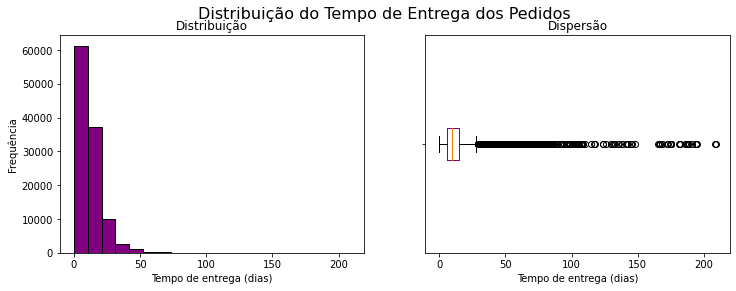

In [1046]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4))
fig.suptitle('Distribuição do Tempo de Entrega dos Pedidos', fontsize=16)
ax1.hist(dados_olist['tempo_entrega'], bins=20, color='purple', edgecolor='black')
ax1.set_xlabel('Tempo de entrega (dias)')
ax1.set_ylabel('Frequência')
ax1.set_title('Distribuição')
ax2.boxplot(dados_olist['tempo_entrega'], vert=False, boxprops=dict(color='purple'))
ax2.set_yticklabels('')
ax2.set_title('Dispersão')
ax2.set_xlabel('Tempo de entrega (dias)')

print("O Histograma abaixo mostra que apenas {} das linhas tem valor de TEMPO DE ENTREGA maior do que 100 dias".format(len(dados_olist[dados_olist.tempo_entrega > 100])))
print("Isso representa {:.2f}% do dataset.\n".format((len(dados_olist[dados_olist.tempo_entrega > 100]) / dados_olist.shape[0])*100))
print("Vamos eliminar estes registros com mais de 100 dias de frete para reduzir o impacto na análise")

plt.show()

#### Pesos dos produtos


Apenas 450 das linhas tem PESO DE PRODUTO maior do que 25000
Representando 0.40% do dataset.

Vamos eliminar estes registros com mais de 25kg para reduzir o impacto na análise


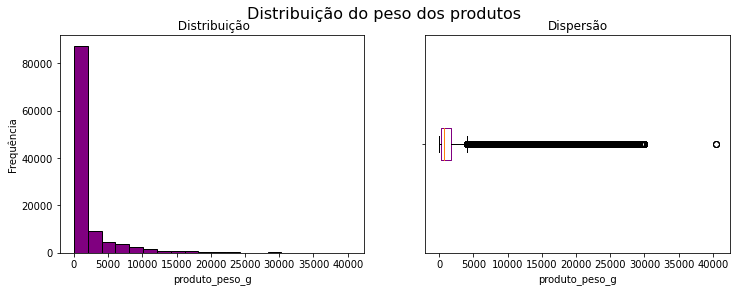

In [1047]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4))
fig.suptitle('Distribuição do peso dos produtos', fontsize=16)
ax1.hist(dados_olist['produto_peso_g'], bins=20, color='purple', edgecolor='black')
ax1.set_xlabel('produto_peso_g')
ax1.set_ylabel('Frequência')
ax1.set_title(' Distribuição')
ax2.boxplot(dados_olist['produto_peso_g'], vert=False, boxprops=dict(color='purple'))
ax2.set_xlabel('produto_peso_g')
ax2.set_yticklabels('')
ax2.set_title('Dispersão')

print("Apenas {} das linhas tem PESO DE PRODUTO maior do que 25000".format(len(dados_olist[dados_olist.produto_peso_g > 25000])))
print("Representando {:.2f}% do dataset.\n".format((len(dados_olist[dados_olist.produto_peso_g > 25000]) / dados_olist.shape[0])*100))
print("Vamos eliminar estes registros com mais de 25kg para reduzir o impacto na análise")
plt.show()

#### Distâncias das entregas

Precisamos eliminar as DISTÂNCIAS irreais acima de 4300 km
Apenas 5 das linhas estão nessa faixa de valor
Representando 0.00% do dataset.



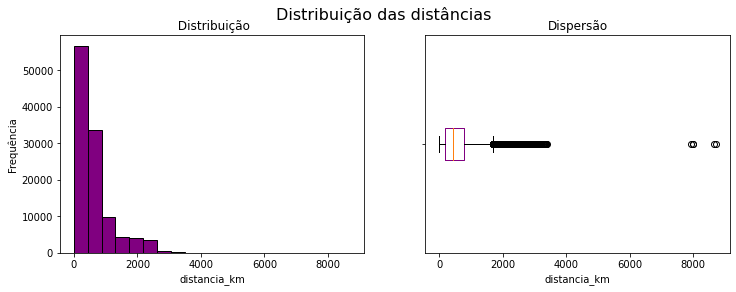

Vamos eliminar estes registros com mais de 4300km para reduzir o impacto na análise


In [1048]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4))
fig.suptitle('Distribuição das distâncias', fontsize=16)
ax1.hist(dados_olist['distancia_km'], bins=20, color='purple', edgecolor='black')
ax1.set_xlabel('distancia_km')
ax1.set_ylabel('Frequência')
ax1.set_title(' Distribuição')
ax2.boxplot(dados_olist['distancia_km'], vert=False, boxprops=dict(color='purple'))
ax2.set_xlabel('distancia_km')
ax2.set_yticklabels('')
ax2.set_title('Dispersão')

print("Precisamos eliminar as DISTÂNCIAS irreais acima de 4300 km")
print("Apenas {} das linhas estão nessa faixa de valor".format(len(dados_olist[dados_olist.distancia_km > 4300])))
print("Representando {:.2f}% do dataset.\n".format((len(dados_olist[dados_olist.distancia_km > 4300]) / dados_olist.shape[0])*100))
plt.show()

print("Vamos eliminar estes registros com mais de 4300km para reduzir o impacto na análise")

#### Valor do frete

Apenas 66 das linhas tem VALOR DE FRETE maior do que 200
Representando 0.59% do dataset.

Vamos eliminar estes registros > 200 para reduzir o impacto na análise


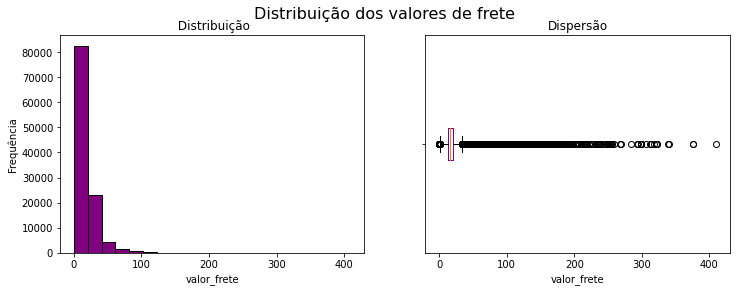

In [1049]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4))
fig.suptitle('Distribuição dos valores de frete', fontsize=16)
ax1.hist(dados_olist['valor_frete'], bins=20, color='purple', edgecolor='black')
ax1.set_xlabel('valor_frete')
ax1.set_ylabel('Frequência')
ax1.set_title(' Distribuição')
ax2.boxplot(dados_olist['valor_frete'], vert=False, boxprops=dict(color='purple'))
ax2.set_xlabel('valor_frete')
ax2.set_yticklabels('')
ax2.set_title('Dispersão')

print("Apenas {} das linhas tem VALOR DE FRETE maior do que 200".format(len(dados_olist[dados_olist.valor_frete > 200])))
print("Representando {:.2f}% do dataset.\n".format((len(dados_olist[dados_olist.valor_frete > 100]) / dados_olist.shape[0])*100))
print("Vamos eliminar estes registros > 200 para reduzir o impacto na análise")
plt.show()

#### Removendo Outliers


In [1050]:
dados_olist.drop(dados_olist[dados_olist.tempo_entrega > 100].index,axis =0, inplace = True)
dados_olist.drop(dados_olist[dados_olist.produto_peso_g > 25000].index,axis =0, inplace = True)
dados_olist.drop(dados_olist[dados_olist.distancia_km > 4300].index,axis =0, inplace = True)
dados_olist.drop(dados_olist[dados_olist.valor_frete > 200].index,axis =0, inplace = True)

### Insights

In [1051]:
dados_olist.describe()

,preco,valor_frete,pagamento_sequencia,pagamento_parcelas,pagamento_valor,produto_nome_tamanho,produto_descricao_tamanho,produto_fotos_qtd,produto_peso_g,produto_comprimento_cm,produto_altura_cm,produto_largura_cm,tempo_entrega,distancia_km
count,112295.000000,112295.000000,112295.000000,112295.000000,112295.000000,112295.000000,112295.000000,112295.000000,112295.000000,112295.000000,112295.000000,112295.000000,112295.000000,112295.000000
mean,117.804549,19.590913,1.089452,2.929258,169.302320,48.782653,785.144824,2.202734,1997.717832,30.135830,16.463209,22.975627,11.906594,595.468272
std,174.092737,13.599537,0.679369,2.765105,258.557138,10.022277,651.644176,1.712793,3356.894710,15.996094,13.136822,11.560157,8.797547,584.960046
min,0.850000,0.000000,1.000000,0.000000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,0.000000,0.000000
25%,39.900000,13.060000,1.000000,1.000000,60.740000,42.000000,345.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6.000000,188.482647
50%,74.000000,16.270000,1.000000,2.000000,107.780000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,10.000000,432.065607
75%,130.000000,21.150000,1.000000,4.000000,188.365000,57.000000,982.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,15.000000,789.627958
max,6729.000000,195.760000,26.000000,24.000000,13664.080000,76.000000,3992.000000,20.000000,25000.000000,105.000000,105.000000,118.000000,100.000000,3383.776936




*   O **tempo de entrega** médio é de **11.9 dias**, com desvio padrão de 8,7 e 75% dos registros com até 15 dias.

*   Os **produtos** pesam texto em negrito em média **1997g**, comprimento médio de **30cm**, altura média de **16.4cm** e largura média de **22.9cm.**

*   A **distância** média das entregas é de **595km**, com desvio padrão de **584km** e 75% dos registros com até **789km**.

*   O **valor de frete** médio é de **R$19.5**, com desvio padrão de **13.5** e 75% dos registros com valores até **21**












**Número total de cidades**

In [1052]:
num_cidades = dados_olist['cliente_cidade'].nunique()
print("Este dataset possui {} cidades.".format(num_cidades))

Este dataset possui 4016 cidades.


# Análise Exploratória de Dados 
Respondendo às perguntas de negócio

### 1. Qual o tempo médio de entrega por estado?

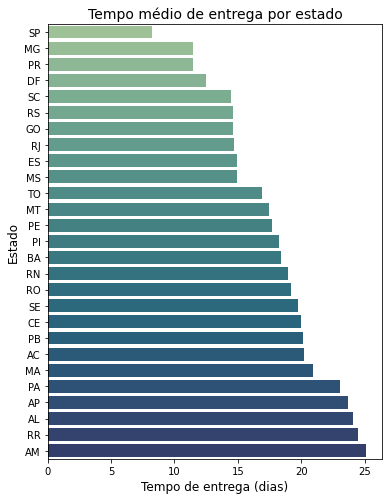

In [1053]:
tempo_entrega_estado = dados_olist.groupby('cliente_estado')['tempo_entrega'].mean()
tempo_entrega_estado = tempo_entrega_estado.sort_values(ascending=True)

plt.figure(figsize=(6,8))
sns.barplot(x=tempo_entrega_estado.values, y=tempo_entrega_estado.index, palette='crest')
plt.title('Tempo médio de entrega por estado', fontsize=14)
plt.xlabel('Tempo de entrega (dias)', fontsize=12)
plt.ylabel('Estado', fontsize=12)
plt.show()

Os estados do **sudeste, sul e centroeste** parecem concentrar o **menor tempo médio de entrega**, enquanto os estados do **norte e nordeste** se mostram com **média mais elevada**.

Vamos fazer também um comparativo de onde estão concentrados os vendedores por estado, talvez isso explique um pouco essa diferença grande entre o tempo de entrega das regiões.

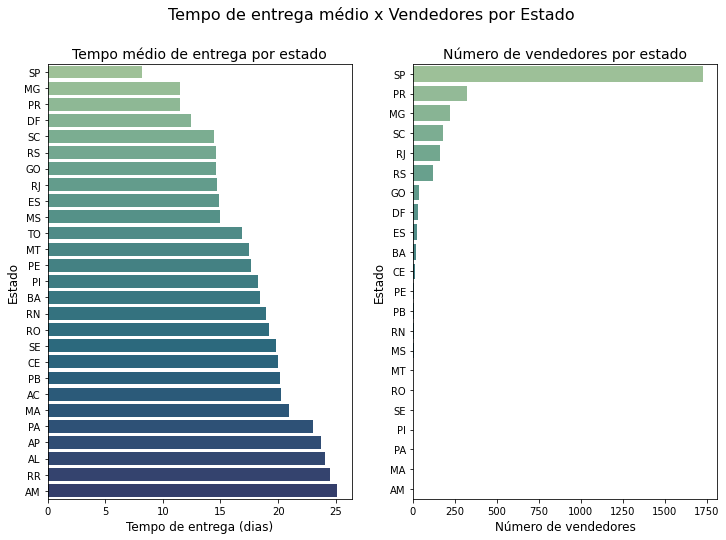

In [1054]:
estados_vendedores = dados_olist.groupby('vendedor_estado')['vendedor_id'].nunique().sort_values(ascending=False)

fig, axs = plt.subplots(ncols=2, figsize=(12, 8))
fig.suptitle('Tempo de entrega médio x Vendedores por Estado', fontsize=16)
sns.barplot(x=tempo_entrega_estado.values, y=tempo_entrega_estado.index, palette='crest', ax=axs[0])
axs[0].set_title('Tempo médio de entrega por estado', fontsize=14)
axs[0].set_xlabel('Tempo de entrega (dias)', fontsize=12)
axs[0].set_ylabel('Estado', fontsize=12)
sns.barplot(x=estados_vendedores.values, y=estados_vendedores.index, palette='crest', ax=axs[1])
axs[1].set_title('Número de vendedores por estado', fontsize=14)
axs[1].set_xlabel('Número de vendedores', fontsize=12)
axs[1].set_ylabel('Estado', fontsize=12)
plt.show()

A imensa maioria dos **vendedores** estão no **estado de SP**, o que pode impactar no baixo tempo de entrega deste estado, assim como as regiões próximas.

###  2. Quais são as cidades que tem o maior tempo de entrega médio?

Aqui vamos levar em consideração apenas as cidades que **possuem mais de 100 pedidos entregues**. Vamo usar este filtro pois uma cidade com poucos pedidos pode registrar uma média enganosa e distorcer a realidade das análises.

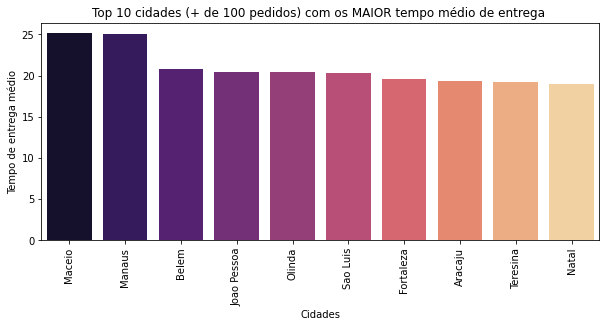

In [1055]:
# calculando o tempo médio de entrega cidades com pelo menos 100 pedidos
cidade_tempo_medio = dados_olist.groupby('cliente_cidade').agg({'tempo_entrega': 'mean', 'pedido_id': 'count'})
cidade_tempo_medio = cidade_tempo_medio[cidade_tempo_medio['pedido_id'] >= 100]
cidade_tempo_medio = cidade_tempo_medio.sort_values(by='tempo_entrega', ascending=False)


plt.figure(figsize=(10,4))
cidade_tempo_medio_top10 = cidade_tempo_medio.head(10)
sns.barplot(x=cidade_tempo_medio_top10.index, y=cidade_tempo_medio_top10['tempo_entrega'], palette='magma')
plt.xticks(rotation=90)
plt.xlabel('Cidades')
plt.ylabel('Tempo de entrega médio')
plt.title('Top 10 cidades (+ de 100 pedidos) com os MAIOR tempo médio de entrega ')
plt.show()

Aqui observamos que as 10 cidades com maior tempo de entrega são da região Norte ou Nordeste do país, com cerca de 20 a 25 dias de tempo médio das entregas.

###  3. As dimensões do produto influenciam no tempo de entrega e no frete?

**dimensões do produto x tempo de entrega**

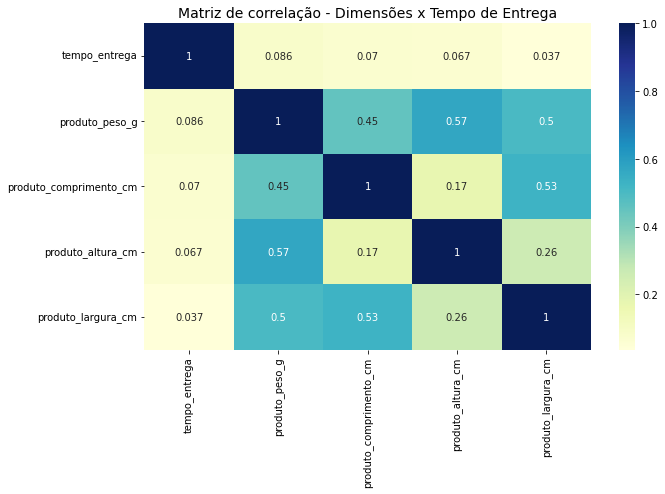

In [1056]:
dimensoes_produto = ['tempo_entrega', 'produto_peso_g', 'produto_comprimento_cm', 'produto_altura_cm', 'produto_largura_cm']

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(dados_olist[dimensoes_produto].corr(), annot=True, cmap='YlGnBu')
plt.title('Matriz de correlação - Dimensões x Tempo de Entrega', fontsize=14)
plt.show()

A matriz acima nos mostra que **não existe correlação relevante** de nenhuma das **dimensões dos produtos** com o **tempo de entrega**.

Vamos analisar agora as **dimensões do produto x valor do frete**

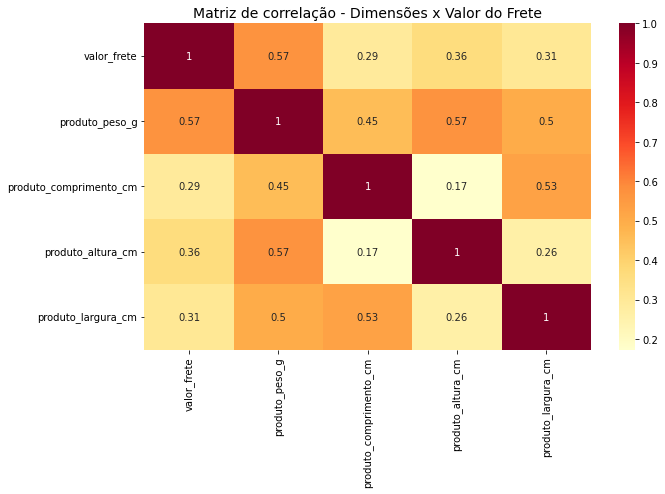

In [1057]:
dimensoes_frete = ['valor_frete', 'produto_peso_g', 'produto_comprimento_cm', 'produto_altura_cm', 'produto_largura_cm']

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(dados_olist[dimensoes_frete].corr(), annot=True, cmap='YlOrRd')
plt.title('Matriz de correlação - Dimensões x Valor do Frete', fontsize=14)
plt.show()

Com base na análise de correlação acima, foram encontrados os seguintes resultados:

*   **Produto_peso_g**: A correlação entre o peso do produto e o valor do frete é **positiva e moderada** (**0.57)**. Isso significa que, à medida que o peso do produto aumenta, espera-se que o valor do frete também aumente, em uma proporção considerável.

*   As demais variáveis **Produto_comprimento_cm**, **Produto_altura_cm** e **Produto_largura_cm** possuem correlações positivas e fracas. Significando que, à medida que o comprimento do produto aumenta, o valor do frete também tende a aumentar, mas em uma proporção consideravelmente menor do que o observado para o peso.






Vamos plotar gráficos de dispersão para visualizar a distribuição de valores e as correlações das **dimenões de produto** com o **valor do frete**

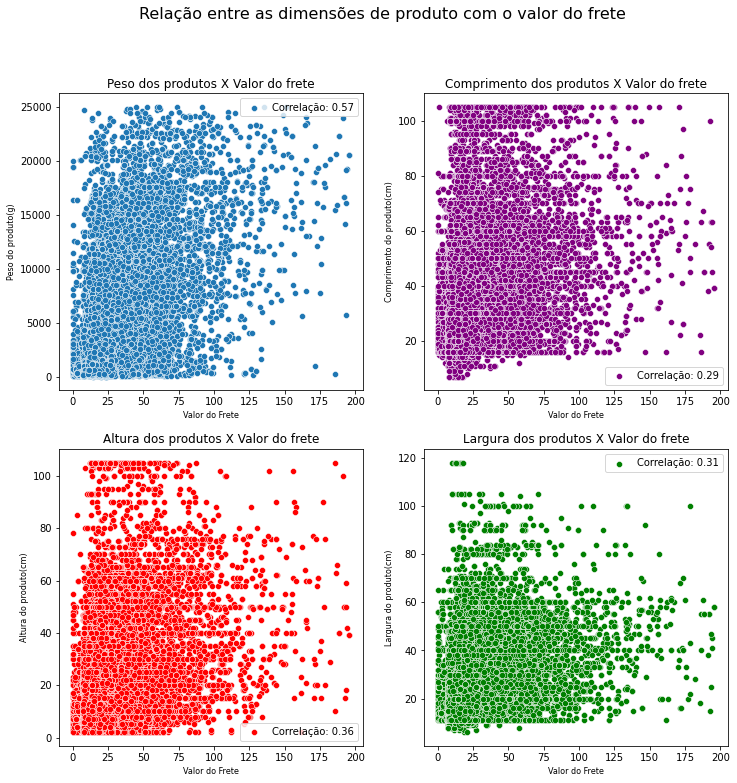

In [1058]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
fig.suptitle('Relação entre as dimensões de produto com o valor do frete', fontsize=16)

coef_corr1 = dados_olist['produto_peso_g'].corr(dados_olist['valor_frete'])
coef_corr2 = dados_olist['produto_comprimento_cm'].corr(dados_olist['valor_frete'])
coef_corr3 = dados_olist['produto_altura_cm'].corr(dados_olist['valor_frete'])
coef_corr4 = dados_olist['produto_largura_cm'].corr(dados_olist['valor_frete'])

sns.scatterplot(ax=axs[0, 0], x='valor_frete', y='produto_peso_g', data=dados_olist, label=f'Correlação: {coef_corr1:.2f}')
axs[0, 0].set_title('Peso dos produtos X Valor do frete', fontsize=12)
axs[0, 0].set_xlabel('Valor do Frete', fontsize=8)
axs[0, 0].set_ylabel('Peso do produto(g)', fontsize=8)
sns.scatterplot(ax=axs[0, 1], x='valor_frete', y='produto_comprimento_cm', data=dados_olist, color='purple', label=f'Correlação: {coef_corr2:.2f}')
axs[0, 1].set_title('Comprimento dos produtos X Valor do frete', fontsize=12)
axs[0, 1].set_xlabel('Valor do Frete', fontsize=8)
axs[0, 1].set_ylabel('Comprimento do produto(cm)', fontsize=8)
sns.scatterplot(ax=axs[1, 0], x='valor_frete', y='produto_altura_cm', data=dados_olist, color='red', label=f'Correlação: {coef_corr3:.2f}')
axs[1, 0].set_title('Altura dos produtos X Valor do frete', fontsize=12)
axs[1, 0].set_xlabel('Valor do Frete', fontsize=8)
axs[1, 0].set_ylabel('Altura do produto(cm)', fontsize=8)
sns.scatterplot(ax=axs[1, 1], x='valor_frete', y='produto_largura_cm', data=dados_olist, color='green', label=f'Correlação: {coef_corr4:.2f}')
axs[1, 1].set_title('Largura dos produtos X Valor do frete', fontsize=12)
axs[1, 1].set_xlabel('Valor do Frete', fontsize=8)
axs[1, 1].set_ylabel('Largura do produto(cm)', fontsize=8)
plt.show()

Podemos observar que nos 4 gráficos há uma grande dispersão dos pontos, indicando que outros fatores além destas variáveis podem estar influenciando o valor do frete.

###  4. O horário e o dia da semana em que o pedido é realizado impactam o tempo de entrega?

#### Horário x Tempo de entrega

Para analisar se o horário do pedido influencia o tempo de entrega, vamos criar uma função que divide os horários dos pedidos em três períodos do dia: **manhã**, **tarde** e **noite**:

In [1059]:
def periodo_do_dia(hora):
    if hora < 12:
        return 'Manhã'
    elif hora < 18:
        return 'Tarde'
    else:
        return 'Noite'

dados_olist['periodo_do_dia'] = dados_olist['pedido_compra_datahora'].dt.hour.apply(periodo_do_dia)

Plotando o gráfico para comparar o tempo médio de entrega de pedidos em cada período:

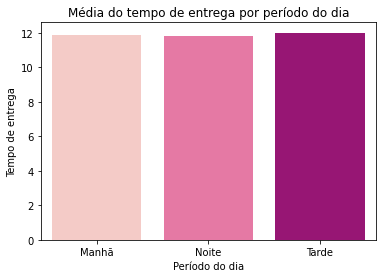

Podemos notar que não existe mudanças significativas da média de tempo de entrega pelos períodos do dia.


In [1060]:
media_entrega_periodo = dados_olist.groupby('periodo_do_dia')['tempo_entrega'].mean()

sns.barplot(x=media_entrega_periodo.index, y=media_entrega_periodo.values, palette='RdPu')
plt.title('Média do tempo de entrega por período do dia')
plt.xlabel('Período do dia')
plt.ylabel('Tempo de entrega')
plt.show()
print('Podemos notar que não existe mudanças significativas da média de tempo de entrega pelos períodos do dia.')

#### Dia da Semana x Tempo de **entrega**

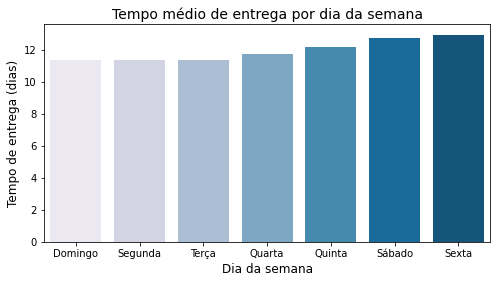

In [1061]:
media_dia_semana = dados_olist.groupby('dia_da_compra')['tempo_entrega'].mean().sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(x=media_dia_semana.index, y=media_dia_semana.values, palette='PuBu')
plt.title('Tempo médio de entrega por dia da semana', fontsize=14)
plt.xlabel('Dia da semana', fontsize=12)
plt.ylabel('Tempo de entrega (dias)', fontsize=12)
plt.show()

O gráfico acima mostra que pedidos feitos entre quinta e sábado tendem a ter um tempo de entrega médio maior em até 1 dia, sendo sexta o impacto maior. 

Uma explicação plausível pode ser o fato destes pedidos serem feitos perto do fim de semana e os vendedores/fornecedores apenas darem início as operações na segunda-feira.

###  5. A distância entre vendedor e cliente impacta o tempo de entrega e valor do frete?

Vamos novamente utilizar de gráficos de dispersão e cálculo de correlação entre as variáveis para analisar o impacto pedido na pergunta.

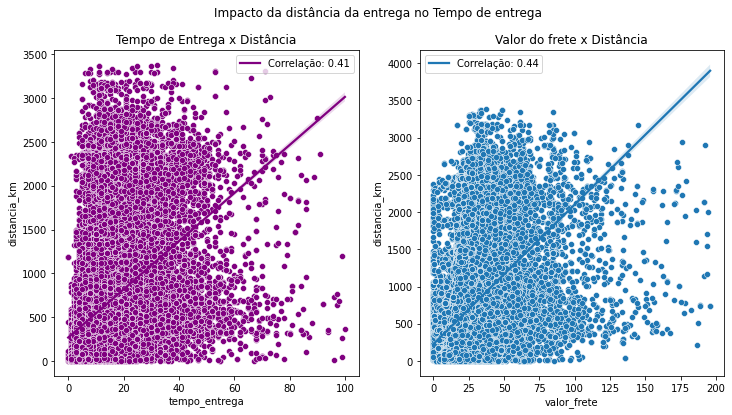

In [1062]:
corr = dados_olist['tempo_entrega'].corr(dados_olist['distancia_km'])
corr2 = dados_olist['valor_frete'].corr(dados_olist['distancia_km'])

fig, axs = plt.subplots(ncols=2, figsize=(12,6))
fig.suptitle('Impacto da distância da entrega no Tempo de entrega')
axs[0].set_title('Tempo de Entrega x Distância')
sns.scatterplot(data=dados_olist, x='tempo_entrega', y='distancia_km', color ='purple', ax=axs[0])
sns.regplot(data=dados_olist, x='tempo_entrega', y='distancia_km', scatter=False, color ='purple', label=f'Correlação: {corr:.2f}', ax=axs[0])
axs[0].legend()
axs[1].set_title('Valor do frete x Distância')
sns.scatterplot(data=dados_olist, x='valor_frete', y='distancia_km', ax=axs[1])
sns.regplot(data=dados_olist, x='valor_frete', y='distancia_km', scatter=False, label=f'Correlação: {corr2:.2f}', ax=axs[1])
axs[1].legend()
plt.show()

A Correlação encontrada entre **tempo de entrega** e **distância** foi de **0.41** e a correlação entre **valor do frete **e **distância** foi de **0.44**. Isso indica que, à medida que a distância aumenta, o tempo de entrega e o valor do frete tendem a aumentar, mas não de forma muito intensa.

Os dois gráficos mostram grande dispersões, o que pode ser indicativo que outros fatores podem influenciar essas variáveis, como a logística de transporte, a forma de pagamento escolhida pelo cliente, a política de preços da empresa, etc.

# Conclusão

O texto de conclusão com as indicações e insights descobertos aqui estará disponível na próxima versão deste notebook.